# Projet digits-classification

## Intro

## Imports

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


## Loading Data

(60000, 28, 28)


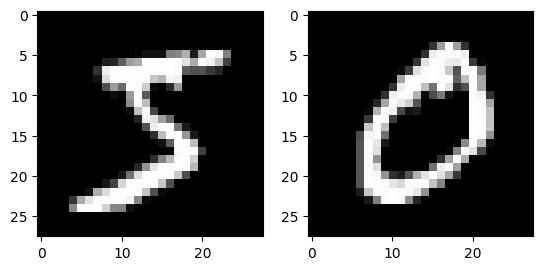

In [59]:
# Let's load the famous MNIST dataset


from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X_train[1], cmap="gray");

## Data Processing

In [60]:
# Reshape the X to explicitly add a single "color" channel
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [61]:
# One Hot Encode our Target for TensorFlow processing
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train.shape

(60000, 10)

## Modeling

On va tester une solution de MLP et de CNN et ensuite comparer les résultats

### MLP Modeling

### CNN Modeling

#### Basic CNN Model

In [31]:
##### Capé 30 epochs

In [ ]:
# ——— CNN Version 1: Minimal Network
model = Sequential()
model.add(layers.Conv2D(16, (4,4), input_shape=(28, 28, 1), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Compilation avec les paramètres basiques
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',  # Descente de gradient stochastique standard
    metrics=['accuracy']
)

# Early stopping simple
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entraînement avec validation split et early stopping
history = model.fit(
    X_train, y_cat_train,
    validation_split=0.2,  # 20% des données pour validation
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7980 - loss: 0.7561 - val_accuracy: 0.9085 - val_loss: 0.3191
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9024 - loss: 0.3353 - val_accuracy: 0.9135 - val_loss: 0.3021
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9161 - loss: 0.2979 - val_accuracy: 0.9249 - val_loss: 0.2611
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9239 - loss: 0.2667 - val_accuracy: 0.9386 - val_loss: 0.2230
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9353 - loss: 0.2256 - val_accuracy: 0.9493 - val_loss: 0.1902
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9473 - loss: 0.1828 - val_accuracy: 0.9576 - val_loss: 0.1638
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9561 - loss: 0.1563 - val_accuracy: 0.9643 - val_loss: 0.1397
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9629 - loss: 0.1309 

##### Model basic sans epoch contraignante

In [ ]:
# ——— CNN Version 1: Minimal Network
model = Sequential()
model.add(layers.Conv2D(16, (4,4), input_shape=(28, 28, 1), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Compilation avec les paramètres basiques
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',  # Descente de gradient stochastique standard
    metrics=['accuracy']
)

# Early stopping simple
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Entraînement avec validation split et early stopping
history = model.fit(
    X_train, y_cat_train,
    validation_split=0.2,  # 20% des données pour validation
    epochs=300,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7928 - loss: 0.7549 - val_accuracy: 0.9034 - val_loss: 0.3288
Epoch 2/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9088 - loss: 0.3132 - val_accuracy: 0.9268 - val_loss: 0.2594
Epoch 3/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9228 - loss: 0.2684 - val_accuracy: 0.9400 - val_loss: 0.2170
Epoch 4/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9366 - loss: 0.2206 - val_accuracy: 0.9514 - val_loss: 0.1790
Epoch 5/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9486 - loss: 0.1787 - val_accuracy: 0.9574 - val_loss: 0.1566
Epoch 6/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9586 - loss: 0.1501 - val_accuracy: 0.9647 - val_loss: 0.1367
Epoch 7/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9668 - loss: 0.1222 - val_accuracy: 0.9688 - val_loss: 0.1212
Epoch 8/300
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9680 - loss: 0

In [34]:
model.save('models/basic_cnn_model.keras')

#### Version Intermédiaire

In [ ]:
# ——— CNN Version 2: Common Tricks

model = Sequential()
model.add(layers.Conv2D(16, (3,3), input_shape=(28, 28, 1), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu')) # intermediate layer
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# Callbacks intermédiaires - suppression du ReduceLROnPlateau et simplification
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    # ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entraînement avec validation
history = model.fit(
    X_train, y_cat_train,
    validation_split=0.15,  # Légèrement moins de données de validation
    epochs=300,             # Moins d'époques maximales
    batch_size=32,         # Batch size plus petit, moins efficace
    callbacks=callbacks,
    verbose=1
)

model.save('models/intermediate_cnn_model.keras')

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │        78,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,200 (317.19 KB)

 Trainable params: 81,200 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8755 - loss: 0.4345

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8755 - loss: 0.4343 - val_accuracy: 0.9817 - val_loss: 0.0642
Epoch 2/300
1592/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9802 - loss: 0.0619

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9802 - loss: 0.0619 - val_accuracy: 0.9841 - val_loss: 0.0515
Epoch 3/300
1586/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9867 - loss: 0.0420

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9879 - val_loss: 0.0478
Epoch 4/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9898 - loss: 0.0319 - val_accuracy: 0.9843 - val_loss: 0.0565
Epoch 5/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9876 - val_loss: 0.0442
Epoch 6/300
1592/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9947 - loss: 0.0178

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9888 - val_loss: 0.0421
Epoch 7/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9876 - val_loss: 0.0432
Epoch 8/300
1590/1594 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9962 - loss: 0.0114

1594/1594 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9897 - val_loss: 0.0453
Epoch 9/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9961 - loss: 0.0120 - val_accuracy: 0.9897 - val_loss: 0.0490
Epoch 10/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9846 - val_loss: 0.0689
Epoch 11/300
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9884 - val_loss: 0.0553


#### Version avancée

In [ ]:

# CNN Version 3: Advanced Architecture
model = Sequential([
    # Premier bloc de convolution avec normalisation par lots
    layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Deuxième bloc de convolution
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    # Couches fully connected
    layers.Flatten(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Configuration optimisée
optimizer = Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Callbacks pour améliorer l'entraînement
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001),
    # ModelCheckpoint('models/best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
]

# Entraînement avec validation
history = model.fit(
    X_train, y_cat_train,
    validation_split=0.2,  # 20% des données pour la validation
    epochs=30,             # Nombre d'époques maximal
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

model.save('models/best_cnn_model.keras')

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 872,426 (3.33 MB)

 Trainable params: 871,530 (3.32 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8851 - loss: 0.3703

750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 74ms/step - accuracy: 0.8852 - loss: 0.3701 - val_accuracy: 0.9867 - val_loss: 0.0448 - learning_rate: 0.0010
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9779 - loss: 0.0692 - val_accuracy: 0.9828 - val_loss: 0.0627 - learning_rate: 0.0010
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9848 - loss: 0.0500 - val_accuracy: 0.9861 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9871 - loss: 0.0405

750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9871 - loss: 0.0405 - val_accuracy: 0.9902 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - accuracy: 0.9875 - loss: 0.0408 - val_accuracy: 0.9897 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9898 - loss: 0.0337

750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - accuracy: 0.9898 - loss: 0.0337 - val_accuracy: 0.9912 - val_loss: 0.0310 - learning_rate: 0.0010
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9912 - loss: 0.0272

750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 0.9921 - val_loss: 0.0278 - learning_rate: 0.0010
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9907 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.9907 - loss: 0.0265 - val_accuracy: 0.9915 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 10/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9918 - loss: 0.0239

750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.9918 - loss: 0.0239 - val_accuracy: 0.9944 - val_loss: 0.0208 - learning_rate: 0.0010
Epoch 11/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9931 - val_loss: 0.0254 - learning_rate: 0.0010
Epoch 12/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9936 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 13/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 77ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9939 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 14/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9952 - loss: 0.0139

750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9952 - loss: 0.0139 - val_accuracy: 0.9948 - val_loss: 0.0184 - learning_rate: 5.0000e-04
Epoch 15/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9956 - loss: 0.0133

750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9948 - val_loss: 0.0191 - learning_rate: 5.0000e-04
Epoch 16/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9942 - val_loss: 0.0224 - learning_rate: 5.0000e-04
Epoch 17/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9964 - loss: 0.0102

750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9955 - val_loss: 0.0179 - learning_rate: 5.0000e-04
Epoch 18/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9952 - val_loss: 0.0186 - learning_rate: 5.0000e-04
Epoch 19/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9948 - val_loss: 0.0222 - learning_rate: 5.0000e-04
Epoch 20/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 0.9952 - val_loss: 0.0205 - learning_rate: 5.0000e-04
Epoch 21/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.9970 - loss: 0.0083 - val_accuracy: 0.9952 - val_loss: 0.0199 - learning_rate: 2.5000e-04
Epoch 22/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9952 - val_loss: 0.0200 - learning_rate: 2.5000e-04
Epoch 23/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 72ms/step - a

750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9958 - val_loss: 0.0200 - learning_rate: 1.2500e-04
Epoch 26/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9956 - val_loss: 0.0201 - learning_rate: 1.2500e-04
Epoch 27/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.9990 - loss: 0.0037 - val_accuracy: 0.9957 - val_loss: 0.0207 - learning_rate: 6.2500e-05


#### Prédiction sur le test set à partir du modèle final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


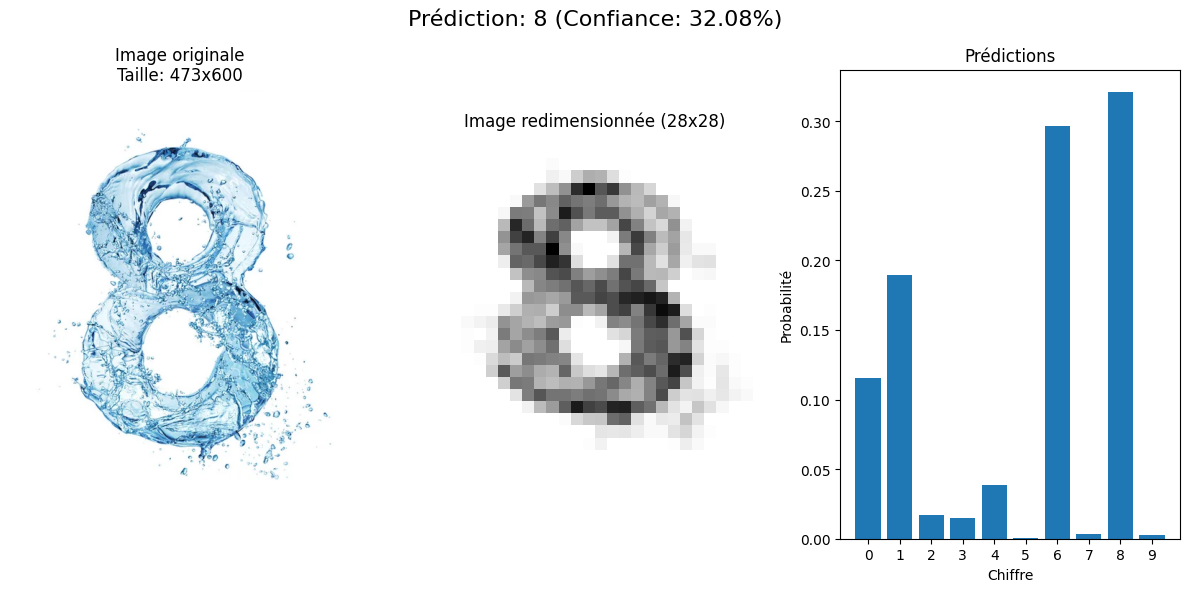

Chiffre prédit: 8
Confiance: 32.08%
Probabilité pour le chiffre 0: 11.53%
Probabilité pour le chiffre 1: 18.91%
Probabilité pour le chiffre 2: 1.74%
Probabilité pour le chiffre 3: 1.49%
Probabilité pour le chiffre 4: 3.88%
Probabilité pour le chiffre 5: 0.03%
Probabilité pour le chiffre 6: 29.68%
Probabilité pour le chiffre 7: 0.36%
Probabilité pour le chiffre 8: 32.08%
Probabilité pour le chiffre 9: 0.30%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Fonction pour charger et préparer une image
def prepare_image(image_path, target_size=(28, 28)):
    # Charger l'image avec PIL
    img = Image.open(image_path)

    # Redimensionner l'image (si elle est trop grande)
    original_size = img.size
    img = img.resize(target_size)

    # Convertir en niveaux de gris si nécessaire
    if img.mode != 'L':
        img = img.convert('L')

    # Convertir en tableau numpy
    img_array = img_to_array(img)

    # Normaliser les valeurs des pixels entre 0 et 1
    img_array = img_array / 255.0

    # Ajouter une dimension pour le canal et une pour le batch
    img_array = np.expand_dims(img_array, axis=-1)  # Ajouter dimension de canal
    img_array = np.expand_dims(img_array, axis=0)   # Ajouter dimension de batch

    return img_array, original_size

# Fonction pour afficher l'image originale et la prédiction
def predict_and_visualize(model, image_path):
    # Préparer l'image
    processed_image, original_size = prepare_image(image_path)

    # Faire la prédiction
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class] * 100

    # Configurer la figure pour l'affichage
    plt.figure(figsize=(12, 6))

    # Afficher l'image originale
    img_original = Image.open(image_path)
    plt.subplot(1, 3, 1)
    plt.title(f"Image originale\nTaille: {original_size[0]}x{original_size[1]}")
    plt.imshow(img_original)
    plt.axis('off')

    # Afficher l'image préparée (28x28)
    plt.subplot(1, 3, 2)
    plt.title("Image redimensionnée (28x28)")
    plt.imshow(processed_image[0, :, :, 0], cmap='gray')
    plt.axis('off')

    # Afficher les résultats
    plt.subplot(1, 3, 3)
    plt.title("Prédictions")
    plt.bar(range(10), predictions[0])
    plt.xticks(range(10))
    plt.xlabel("Chiffre")
    plt.ylabel("Probabilité")

    # Afficher le résultat principal
    plt.suptitle(f"Prédiction: {predicted_class} (Confiance: {confidence:.2f}%)", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"Chiffre prédit: {predicted_class}")
    print(f"Confiance: {confidence:.2f}%")

    # Afficher les probabilités pour chaque classe
    for i, prob in enumerate(predictions[0]):
        print(f"Probabilité pour le chiffre {i}: {prob*100:.2f}%")

# Charger le modèle sauvegardé
model = load_model('models/best_cnn_model.keras')

# Remplacer par le chemin de votre image (par exemple un chiffre manuscrit scanné)
image_path = 'images/water8.png'

# Faire la prédiction et afficher les résultats
predict_and_visualize(model, image_path)

# Si vous n'avez pas d'image de chiffre, vous pouvez utiliser une image du jeu de test MNIST
# Décommentez ce code pour tester avec une image du jeu de test


In [48]:
X_test[42][7]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.51372549],
       [0.99607843],
       [0.6       ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.41568627],
       [0.99607843],
       [0.97647059],
       [0.19607843],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [50]:
# X_test[42]

Chiffre réel: 0
(60000, 28, 28, 1)


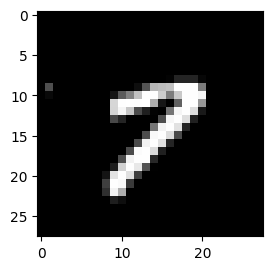

In [58]:
# Sauvegarder une image de test
index = 28  # Choisir une image de test
# plt.imsave('mnist_test_digit.jpg', X_test[index], cmap='gray')
print(f"Chiffre réel: {y_test[index]}")

# Faire la prédiction avec l'image sauvegardée
# predict_and_visualize(model, 'mnist_test_digit.jpg')

print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[index+1], cmap="gray");


### Evaluation des performances des modèles